In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [349]:
data = pd.read_csv('Clean_NFL_Dataset.csv')
data

,Unnamed: 0,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,...,fumbled_2_player_name,fumbled_2_team,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_1_player_id,fumble_recovery_1_player_name,fumble_recovery_2_team,fumble_recovery_2_yards,fumble_recovery_2_player_id,fumble_recovery_2_player_name
0,0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1,1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2,2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
3,3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
4,4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,449366,4059,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
449367,449367,4081,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
449368,449368,4106,2018121700,CAR,NO,CAR,home,NO,CAR,61.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
449369,449369,4128,2018121700,CAR,NO,NO,away,CAR,CAR,39.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN


In [350]:
data.axes

[RangeIndex(start=0, stop=449371, step=1),
 Index(['Unnamed: 0', 'play_id', 'game_id', 'home_team', 'away_team', 'posteam',
        'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
        'quarter_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go',
        'yrdln', 'ydstogo', 'ydsnet', 'play_type', 'yards_gained',
        'yards_after_catch', 'home_timeouts_remaining',
        'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team',
        'total_home_score', 'total_away_score', 'score_differential', 'td_prob',
        'ep', 'epa', 'wp', 'wpa', 'first_down_rush', 'first_down_pass',
        'third_down_converted', 'third_down_failed', 'fourth_down_converted',
        'fourth_down_failed', 'incomplete_pass', 'interception',
        'fumble_forced', 'fumble_not_forced', 'fumble_lost', 'rush_attempt',
        'pass_attempt', 'sack', 'touchdown', 'pass_touchdown', 'rush_touchdown',
        'fumble', 'complete_pass', 'lateral_reception', 'lateral

In [351]:

# QB + WR/TE/RB(?) Duos for outlier (x = num plays vs. y = average yards per play)
    # get all passing plays featuring QB and WR/TE/RB
        # Filter dataframe on 'passer_player_id', 'passer_player_name', 'receiver_player_id', 'receiver_player_name', 'complete_pass', 'yards_gained')
        # Define dictionary with key tuple (passer_player_id, receiver_player_id), value: dataframe with play information
        # Iterate through dataframe and save each entry that matches to the dictionary
            # If current tuple is in dictionary, access the dataframe and append the entry to the dataframe
            # Else, the current tuple does not exist so add it to the dataframe
        # Iterate through the newly created dictionary and replace each dataframe with a tuple of num plays and average yards per play
        # Iterate through dictionary and translate the qb/receiver duos to strings formatted as f'{dict[x][0] (QB)}, {dict[x][1] (WR/ w/e)}'
        # Save to a new dictionary with key as formatted string and val as the tuple information (num plays vs. average)
        # At this point might be useful to cast tuple to a list
        # Turn dictionary into a pandas dataframe
        # Plot
            # Also might be able to plot the tuple/list in place and add the key as label


In [352]:
filtered_frame = data.filter(items = ['passer_player_id', 'passer_player_name', 'receiver_player_id', 'receiver_player_name', 'yards_gained']).dropna().reset_index().drop(columns=['index'])

In [353]:
newFrame = pd.DataFrame()
duosDict = {}
for row in filtered_frame.itertuples():
    if (row.passer_player_id, row.receiver_player_id) in duosDict:
        intermediateFrame = pd.DataFrame(data={'passer_player_id':row.passer_player_id, 'passer_player_name': row.passer_player_name,'receiver_player_id': row.receiver_player_id, 'receiver_player_name': row.receiver_player_name, 'yards_gained': row.yards_gained}, index=[0])
        duosDict[(row.passer_player_id, row.receiver_player_id)] = pd.concat([duosDict[(row.passer_player_id, row.receiver_player_id)], intermediateFrame])
    else:
        duosDict[(row.passer_player_id, row.receiver_player_id)] = pd.DataFrame(data={'passer_player_id':row.passer_player_id, 'passer_player_name': row.passer_player_name,'receiver_player_id': row.receiver_player_id, 'receiver_player_name': row.receiver_player_name, 'yards_gained': row.yards_gained}, index=[0])

In [354]:
# Point labels
labels = []
# Number of attempts (plays) 
x = []
# Average yards gained
y = []
tempDict = {}
for key in duosDict:
    passer = duosDict[key]['passer_player_name'].unique()[0]
    receiver = duosDict[key]['receiver_player_name'].unique()[0]
    xVal = len(duosDict[key]['receiver_player_name'])
    yVal = duosDict[key]['yards_gained'].mean()
    tempDict[f'{passer}, {receiver}'] = [xVal, yVal]
    labels.append(f'{passer}, {receiver}')
    x.append(xVal)
    y.append(yVal)


In [355]:
duosFrame = pd.DataFrame.from_dict(tempDict, orient='index', columns=['total_plays', 'yards_gained'])

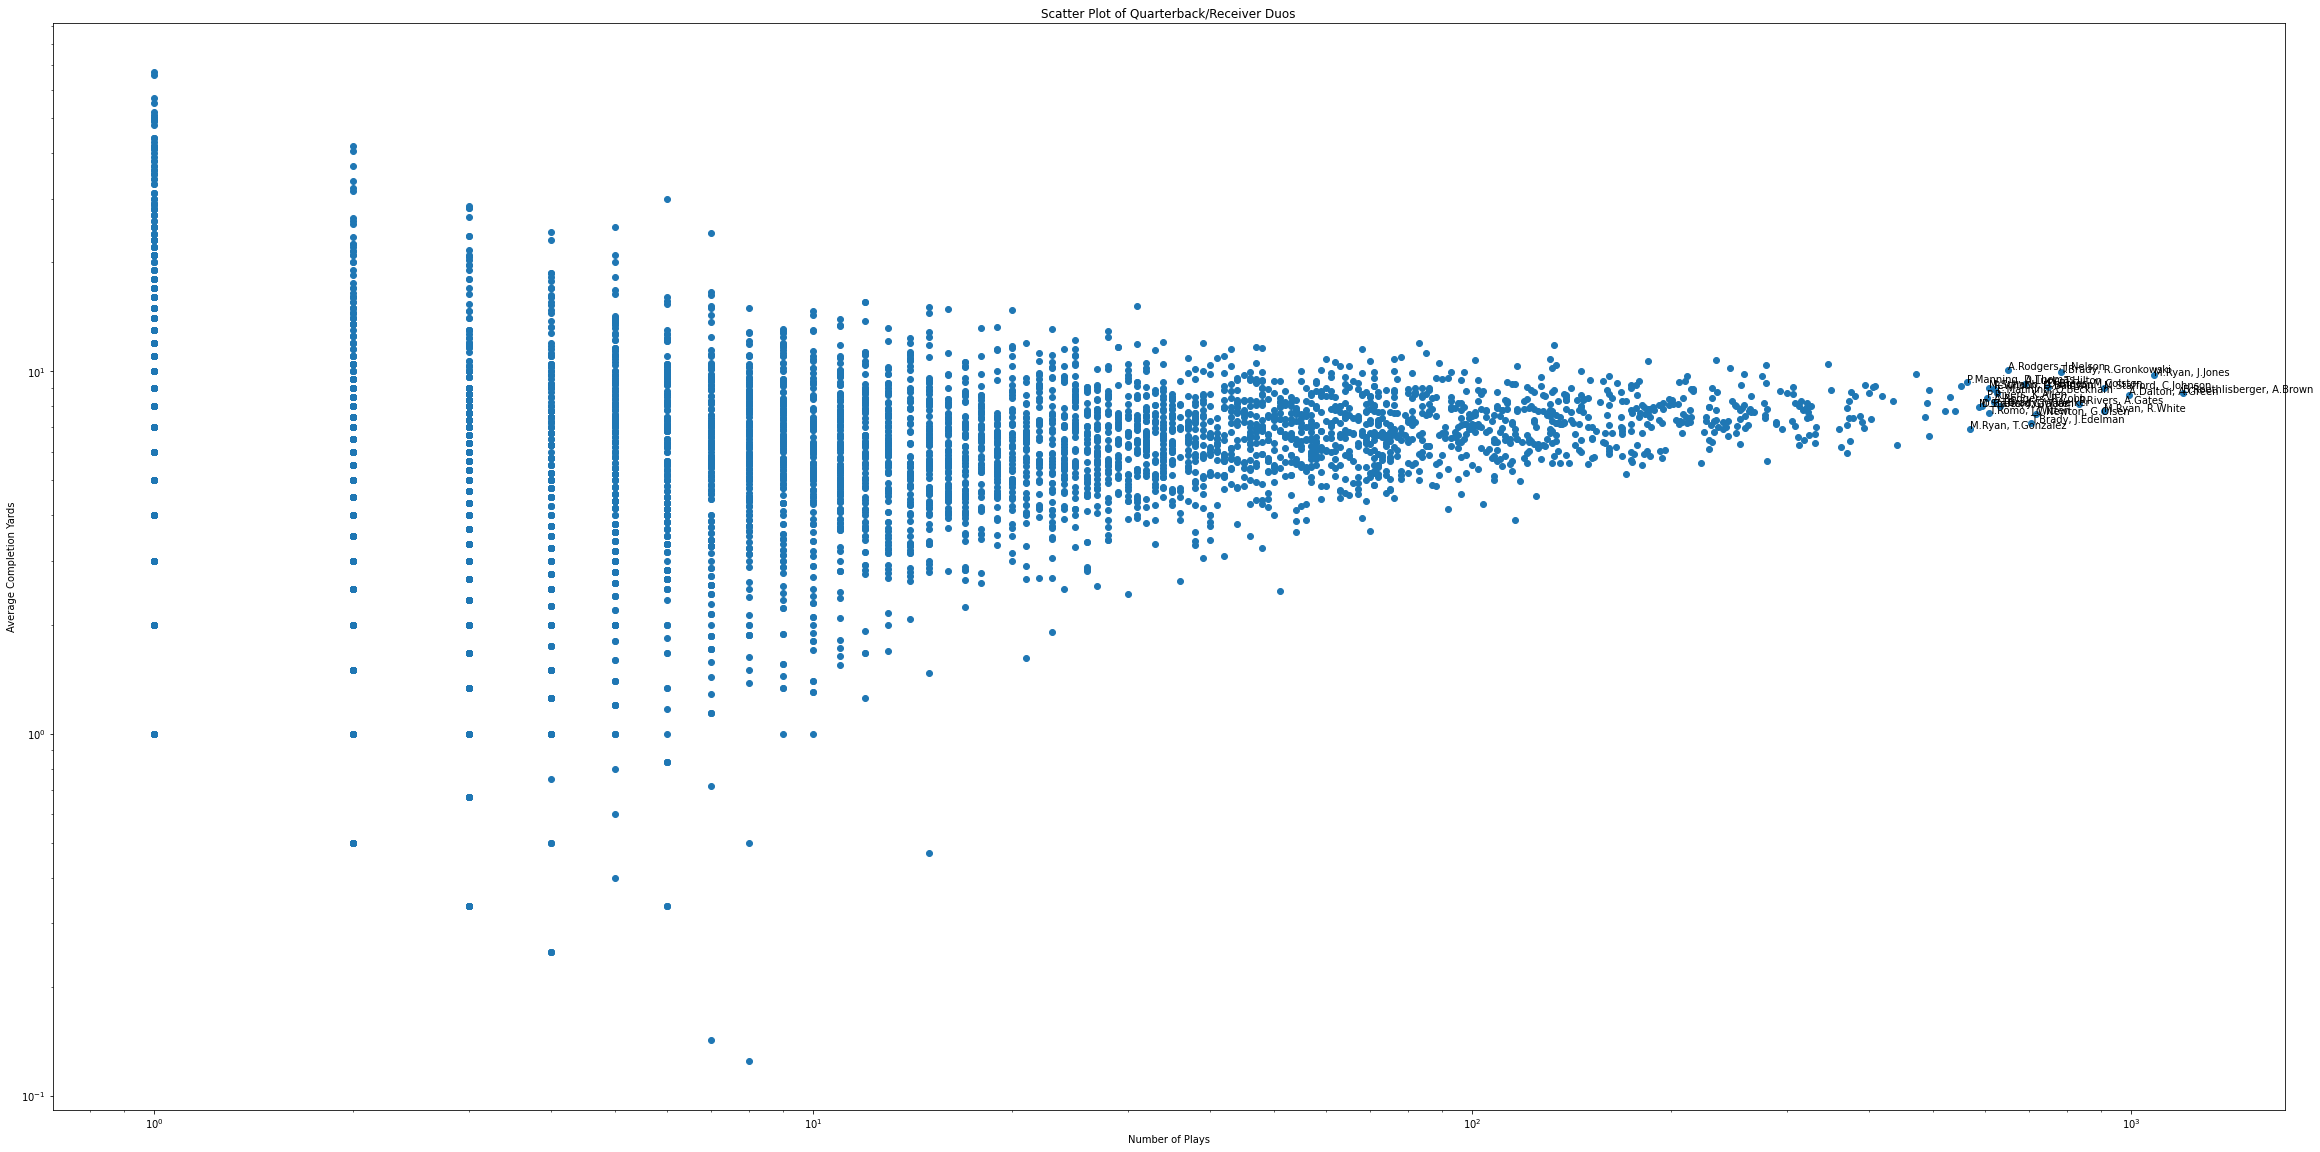

In [356]:
fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(40,20)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Scatter Plot of Quarterback/Receiver Duos')
ax.set_xlabel('Number of Plays')
ax.set_ylabel('Average Completion Yards')

for i, txt in enumerate(labels):
    if x[i] > 555:
        ax.annotate(txt, (x[i], y[i]))

In [357]:
filteredLabels = []
filteredX = []
filteredY = []

for i in range(0,len(x)):
    if x[i] > 555:
        filteredLabels.append(labels[i])
        filteredX.append(x[i])
        filteredY.append(y[i])

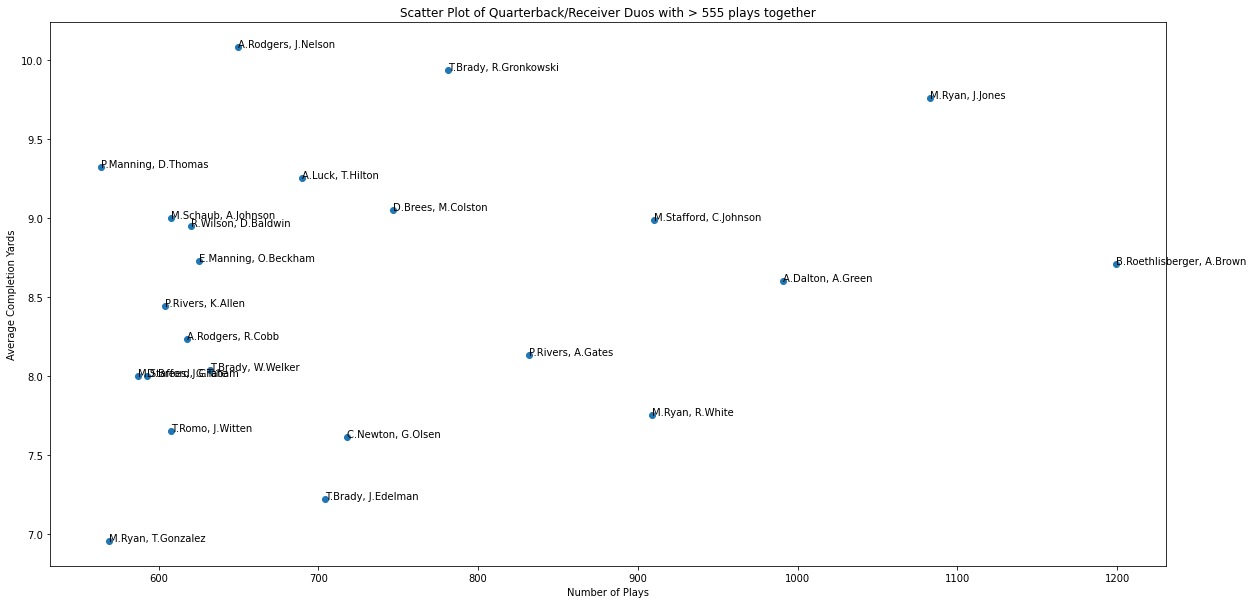

In [358]:
fig, ax = plt.subplots()
ax.scatter(filteredX, filteredY)
fig.set_size_inches(20,10)
ax.set_title('Scatter Plot of Quarterback/Receiver Duos with > 555 plays together')
ax.set_xlabel('Number of Plays')
ax.set_ylabel('Average Completion Yards')

for i, txt in enumerate(filteredLabels):
    if filteredX[i] > 200:
        ax.annotate(txt, (filteredX[i], filteredY[i]))

In [359]:
duosFrame

,total_plays,yards_gained
"B.Roethlisberger, H.Ward",263,7.760456
"B.Roethlisberger, M.Wallace",346,10.476879
"K.Collins, A.Hall",20,4.900000
"B.Roethlisberger, S.Holmes",127,9.110236
"B.Roethlisberger, H.Miller",541,7.774492
...,...,...
"J.Johnson, J.Sprinkle",3,6.333333
"N.Foles, J.Adams",1,0.000000
"N.Foles, G.Tate",5,8.600000
"J.Hekker, K.Hodge",1,0.000000


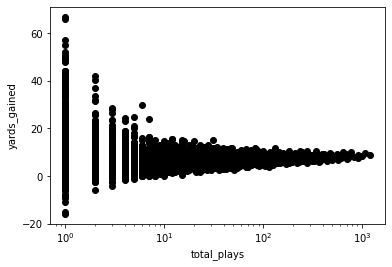

In [360]:
X = duosFrame[['yards_gained','total_plays']]
#Visualise data points
plt.scatter(X['total_plays'],X['yards_gained'],c='black')
plt.xlabel('total_plays')
plt.ylabel('yards_gained')
plt.xscale('log')
plt.xscale('log')
plt.show()


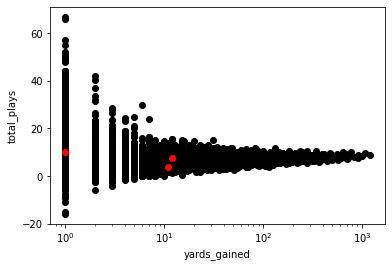

In [361]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['total_plays'],X['yards_gained'],c='black')
plt.scatter(Centroids['total_plays'],Centroids['yards_gained'],c='red')
plt.xlabel('yards_gained')
plt.ylabel('total_plays')
plt.xscale('log')
plt.xscale('log')
plt.show()

In [362]:

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['yards_gained']-row_d['yards_gained'])**2
            d2=(row_c['total_plays']-row_d['total_plays'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[['total_plays','yards_gained']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['total_plays'] - Centroids['total_plays']).sum() + (Centroids_new['yards_gained'] - Centroids['yards_gained']).sum()
    Centroids = X.groupby(["Cluster"]).mean()[['total_plays','yards_gained']]

In [363]:
print(Centroids)

         total_plays  yards_gained
Cluster                           
1         164.516129      7.412391
2         555.339623      8.127182
3          14.679726      5.978646


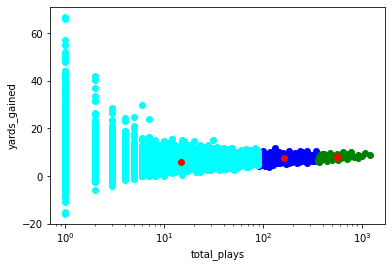

In [364]:
color=['blue','green','cyan']
for k in range(K):
    outlierData=X[X["Cluster"]==k+1]
    plt.scatter(outlierData['total_plays'],outlierData['yards_gained'],c=color[k])
plt.scatter(Centroids['total_plays'],Centroids['yards_gained'],c='red')
plt.xlabel('total_plays')
plt.ylabel('yards_gained')
plt.xscale('log')
plt.xscale('log')
plt.show()

In [365]:
# RB Yards gained (x = num plays, y = average yards per rush)
    # Explosive play percentage
        # Number of rushes 25+ yards per average yards per rush


In [366]:
filtered_running_data = data.filter(items = ['rusher_player_id', 'rusher_player_name', 'yards_gained']).dropna().reset_index().drop(columns=['index'])

In [367]:
filtered_running_data

,rusher_player_id,rusher_player_name,yards_gained
0,00-0022250,W.Parker,-3.0
1,00-0026164,C.Johnson,0.0
2,00-0026164,C.Johnson,-2.0
3,00-0022250,W.Parker,-1.0
4,00-0026164,C.Johnson,32.0
...,...,...,...
136442,00-0033906,A.Kamara,3.0
136443,00-0027966,M.Ingram,3.0
136444,00-0033906,A.Kamara,3.0
136445,00-0032881,T.Lewis,4.0


In [368]:
newFrame = pd.DataFrame()
runningDict = {}
for row in filtered_running_data.itertuples():
    if f'{row.rusher_player_id}' in runningDict:
        intermediateFrame = pd.DataFrame(data={'rusher_player_id':row.rusher_player_id, 'rusher_player_name': row.rusher_player_name, 'yards_gained': row.yards_gained}, index=[0])
        runningDict[row.rusher_player_id] = pd.concat([runningDict[row.rusher_player_id], intermediateFrame])
    else:
        runningDict[row.rusher_player_id] = pd.DataFrame(data={'rusher_player_id':row.rusher_player_id, 'rusher_player_name': row.rusher_player_name, 'yards_gained': row.yards_gained}, index=[0])


In [369]:
runningDict['00-0026164']

,rusher_player_id,rusher_player_name,yards_gained
0,00-0026164,C.Johnson,0.0
0,00-0026164,C.Johnson,-2.0
0,00-0026164,C.Johnson,32.0
0,00-0026164,C.Johnson,3.0
0,00-0026164,C.Johnson,1.0
...,...,...,...
0,00-0026164,C.Johnson,0.0
0,00-0026164,C.Johnson,1.0
0,00-0026164,C.Johnson,6.0
0,00-0026164,C.Johnson,2.0


In [370]:
# Point labels
labels = []
# Number of attempts (plays) 
x = []
# Average yards gained
y = []
tempRunningDict = {}
for key in runningDict:
    xVal = 0
    rusher = runningDict[key]['rusher_player_name'].unique()[0]
    for val in runningDict[key]['yards_gained']:
        if val > 25:
            xVal+=1
    yVal = runningDict[key]['yards_gained'].mean()
    tempRunningDict[f'{rusher}'] = [xVal, yVal]
tempRunningDict

{'W.Parker': [1, 3.9693877551020407],
 'C.Johnson': [0, 9.666666666666666],
 'R.Mendenhall': [15, 3.9380281690140846],
 'L.White': [0, 3.46875],
 'B.Roethlisberger': [1, 2.7028985507246377],
 'M.Moore': [0, 11.333333333333334],
 'K.Collins': [0, 0.625],
 'J.Lewis': [0, 6.0],
 'J.Cribbs': [3, 5.588235294117647],
 'J.Davis': [0, 6.666666666666667],
 'A.Peterson': [0, 7.285714285714286],
 'J.Dugan': [0, 1.8],
 'P.Harvin': [5, 6.328767123287672],
 'N.Tahi': [0, 1.5],
 'C.Taylor': [1, 3.061946902654867],
 'B.Quinn': [0, 4.0],
 'T.Jackson': [1, 2.0259740259740258],
 'M.Bell': [2, 3.4383561643835616],
 'R.Bush': [16, 4.546605293440736],
 'Kv.Smith': [2, 3.779291553133515],
 'J.Felton': [0, 3.2830188679245285],
 'A.Brown': [0, 4.096774193548387],
 'M.Stafford': [0, 3.5067567567567566],
 'M.Barber': [5, 3.9183673469387754],
 'T.Choice': [3, 3.9535714285714287],
 'T.Romo': [0, 2.4444444444444446],
 'F.Jones': [9, 4.488095238095238],
 'C.Williams': [1, 16.5],
 'D.Ward': [4, 4.194312796208531],
 '

In [371]:
runningFrame = pd.DataFrame.from_dict(tempRunningDict, orient='index', columns=['big_plays', 'avg_yards_gained'])
runningFrame

,big_plays,avg_yards_gained
W.Parker,1,3.969388
C.Johnson,0,9.666667
R.Mendenhall,15,3.938028
L.White,0,3.468750
B.Roethlisberger,1,2.702899
...,...,...
K.Ford,0,3.285714
B.Anger,0,0.000000
D.Waller,0,21.000000
R.Dixon,0,14.000000


In [372]:
filteredRunningLabels = []
filteredRunningX = []
filteredRunningY = []

for i in range(0,len(x)):
    if x[i] > 555:
        filteredLabels.append(labels[i])
        filteredX.append(x[i])
        filteredY.append(y[i])

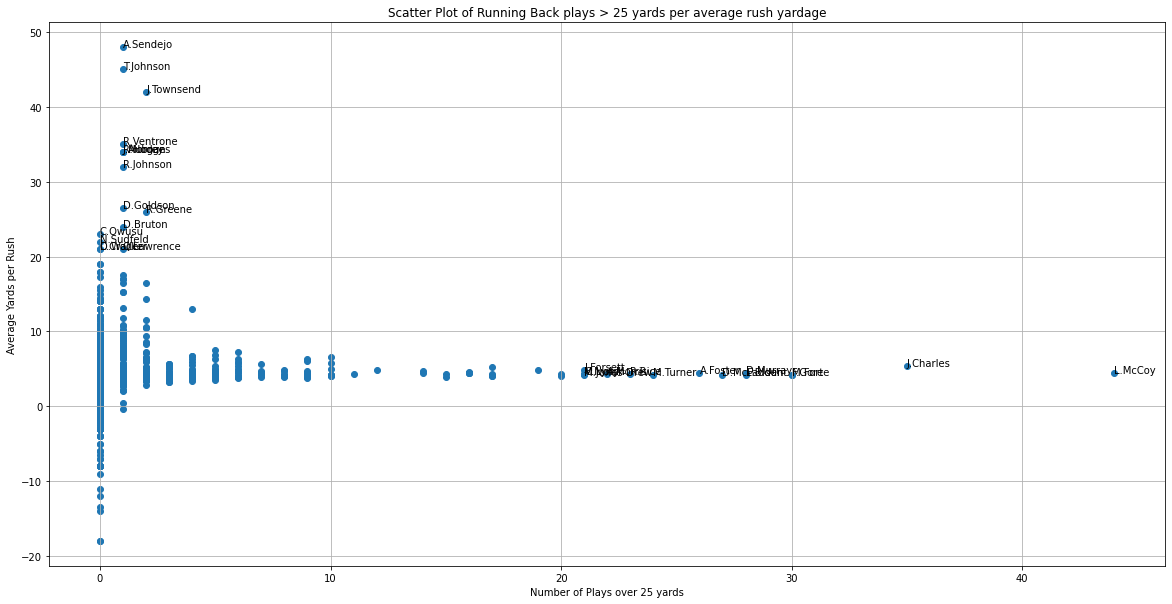

In [373]:
fig, ax = plt.subplots()
ax.scatter(runningFrame['big_plays'],runningFrame['avg_yards_gained'])
fig.set_size_inches(20,10)
ax.set_title('Scatter Plot of Running Back plays > 25 yards per average rush yardage')
ax.set_xlabel('Number of Plays over 25 yards')
ax.set_ylabel('Average Yards per Rush')
for i, txt in enumerate(runningFrame.index.to_list()):
    if runningFrame.iloc[i][0] > 20 or runningFrame.iloc[i][1] > 20:
        ax.annotate(txt, (runningFrame.iloc[i][0], runningFrame.iloc[i][1]))   
ax.grid()
plt.show()

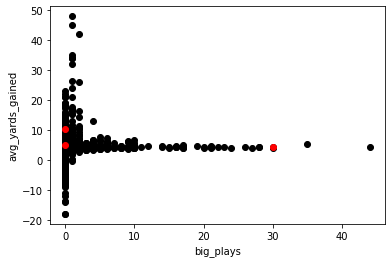

In [374]:
#number of clusters
K=3
X = runningFrame
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['big_plays'],X['avg_yards_gained'],c='black')
plt.scatter(Centroids['big_plays'],Centroids['avg_yards_gained'],c='red')
plt.xlabel('big_plays')
plt.ylabel('avg_yards_gained')
# plt.xscale('log')
# plt.xscale('log')
plt.show()

In [375]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['big_plays']-row_d['big_plays'])**2
            d2=(row_c['avg_yards_gained']-row_d['avg_yards_gained'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[['avg_yards_gained','big_plays']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['avg_yards_gained'] - Centroids['avg_yards_gained']).sum() + (Centroids_new['big_plays'] - Centroids['big_plays']).sum()
    Centroids = X.groupby(["Cluster"]).mean()[['avg_yards_gained','big_plays']]

In [376]:
Centroids

,avg_yards_gained,big_plays
Cluster,,
1,19.211661,0.592593
2,4.415357,21.354839
3,3.238565,0.903030


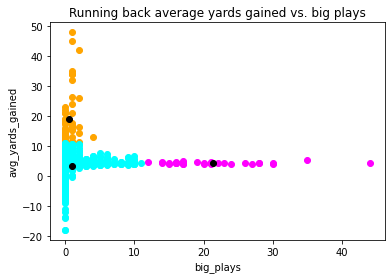

In [377]:
color=['orange','magenta','cyan']
for k in range(K):
    outlierData=X[X["Cluster"]==k+1]
    plt.scatter(outlierData['big_plays'],outlierData['avg_yards_gained'],c=color[k])
plt.scatter(Centroids['big_plays'],Centroids['avg_yards_gained'],c='black')
plt.xlabel('big_plays')
plt.ylabel('avg_yards_gained')
plt.title('Running back average yards gained vs. big plays')
plt.show()

In [378]:
# QB goal-to-go, pass attempt, touchdown (red-zone clutch) (on a per-play basis)
# QB 4th down conversion passing percentage (on a per-play basis)

In [380]:
data.axes

[RangeIndex(start=0, stop=449371, step=1),
 Index(['Unnamed: 0', 'play_id', 'game_id', 'home_team', 'away_team', 'posteam',
        'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
        'quarter_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go',
        'yrdln', 'ydstogo', 'ydsnet', 'play_type', 'yards_gained',
        'yards_after_catch', 'home_timeouts_remaining',
        'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team',
        'total_home_score', 'total_away_score', 'score_differential', 'td_prob',
        'ep', 'epa', 'wp', 'wpa', 'first_down_rush', 'first_down_pass',
        'third_down_converted', 'third_down_failed', 'fourth_down_converted',
        'fourth_down_failed', 'incomplete_pass', 'interception',
        'fumble_forced', 'fumble_not_forced', 'fumble_lost', 'rush_attempt',
        'pass_attempt', 'sack', 'touchdown', 'pass_touchdown', 'rush_touchdown',
        'fumble', 'complete_pass', 'lateral_reception', 'lateral

In [385]:
filtered_clutch_frame = data.filter(items = ['passer_player_id', 'passer_player_name','goal_to_go', 'pass_attempt', 'fourth_down_converted', 'fourth_down_failed', 'pass_touchdown']).dropna().reset_index().drop(columns=['index'])

In [390]:
newFrame = pd.DataFrame()
clutchDict = {}
for row in filtered_clutch_frame.itertuples():
    if f'{row.passer_player_id}' in clutchDict:
        intermediateFrameFourth = pd.DataFrame(data={'passer_player_id':row.passer_player_id, 'passer_player_name': row.passer_player_name, 'pass_attempt': row.pass_attempt, 'fourth_down_converted': row.fourth_down_converted, 'fourth_down_failed': row.fourth_down_failed}, index=[0])
        intermediateFrameGoal = pd.DataFrame(data={'passer_player_id':row.passer_player_id, 'passer_player_name': row.passer_player_name, 'pass_attempt': row.pass_attempt, 'goal_to_go': row.goal_to_go, 'pass_touchdown': row.pass_touchdown}, index=[0])
        clutchDict[row.passer_player_id][0] = pd.concat([clutchDict[row.passer_player_id][0], intermediateFrameFourth])
        clutchDict[row.passer_player_id][1] = pd.concat([clutchDict[row.passer_player_id][1], intermediateFrameGoal])

    else:
        clutchDict[row.passer_player_id] = [pd.DataFrame(data={'passer_player_id':row.passer_player_id, 'passer_player_name': row.passer_player_name, 'pass_attempt': row.pass_attempt, 'fourth_down_converted': row.fourth_down_converted, 'fourth_down_failed': row.fourth_down_failed}, index=[0]),pd.DataFrame(data={'passer_player_id':row.passer_player_id, 'passer_player_name': row.passer_player_name, 'pass_attempt': row.pass_attempt, 'goal_to_go': row.goal_to_go, 'pass_touchdown': row.pass_touchdown}, index=[0])]


In [391]:
clutchDict

{'00-0022924': [   passer_player_id passer_player_name  pass_attempt  fourth_down_converted  \
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  ..              ...                ...           ...                    ...   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  0        00-0022924   B.Roethlisberger           1.0                    0.0   
  
      fourt

In [395]:
clutchDict['00-0033280'][0]['passer_player_name'].unique()[0]

'C.McCaffrey'

In [400]:
tempClutchDict = {}
for key in clutchDict:
    # Get the name of the player
    # First frame (Fourth down)
        # Iterate through all columns in the frame
            # If the pass attempt is 1
                # Create two variables, fourth_counverted and fourth_failed
                # Add to the count of the respective variable if the element of the frame is 1
                # add fourth converted and failed and divide converted by result and save to a variable fourth_down_conversion_pct
    # Second frame (goal to go)
        # iterate through all columns in the frame
            # create two variables red_zone_touchdown and red_zone_attempt
            # If goal to go is 1
                # If pass attempt is 1
                    # add 1 to red_zone_attempt
                    # If pass_touchdown is 1
                        # add 1 to red_zone_touchdown
            # divide red_zone_touchdown by red_zone_attempt and save to red_zone_touchdown_pct
    # add value to clutchDict[player_name] = [fourth_down_conversion_pct, red_zone_touchdown_pct]
    
    player_name = clutchDict[key][0]['passer_player_name'].unique()[0]
    fourth_converted = 0
    fourth_failed = 0
    for fourthDownRow in clutchDict[key][0].itertuples():
        if fourthDownRow.pass_attempt == 1.0:
            if fourthDownRow.fourth_down_converted == 1.0:
                fourth_converted+=1
            if fourthDownRow.fourth_down_failed == 1.0:
                fourth_failed+=1
    if fourth_converted + fourth_failed != 0:
        fourth_down_conversion_pct = (fourth_converted/(fourth_converted + fourth_failed))
    else:
        fourth_down_conversion_pct = 0

    red_zone_touchdown = 0
    red_zone_attempt = 0 
    for redZoneRow in clutchDict[key][1].itertuples():
        if redZoneRow.goal_to_go == 1.0:
            if redZoneRow.pass_attempt == 1.0:
                red_zone_attempt+=1
                if redZoneRow.pass_touchdown == 1.0:
                    red_zone_touchdown+=1
    if red_zone_attempt != 0:
        red_zone_touchdown_pct = (red_zone_touchdown/red_zone_attempt)
    else:
        red_zone_touchdown_pct = 0
    tempClutchDict[player_name] = [fourth_down_conversion_pct, red_zone_touchdown_pct]

In [422]:
clutchQBFrame = pd.DataFrame.from_dict(tempClutchDict, orient='index', columns=['fourth_down_conversion_pct', 'red_zone_touchdown_pct'])
clutchQBFrame

,fourth_down_conversion_pct,red_zone_touchdown_pct
B.Roethlisberger,0.490196,0.342857
K.Collins,0.450000,0.384615
B.Quinn,0.307692,0.312500
B.Favre,0.461538,0.400000
T.Jackson,0.583333,0.250000
...,...,...
C.Boswell,1.000000,1.000000
B.Ellington,0.000000,0.000000
Z.Jones,0.000000,0.000000
K.Lauletta,0.000000,0.000000


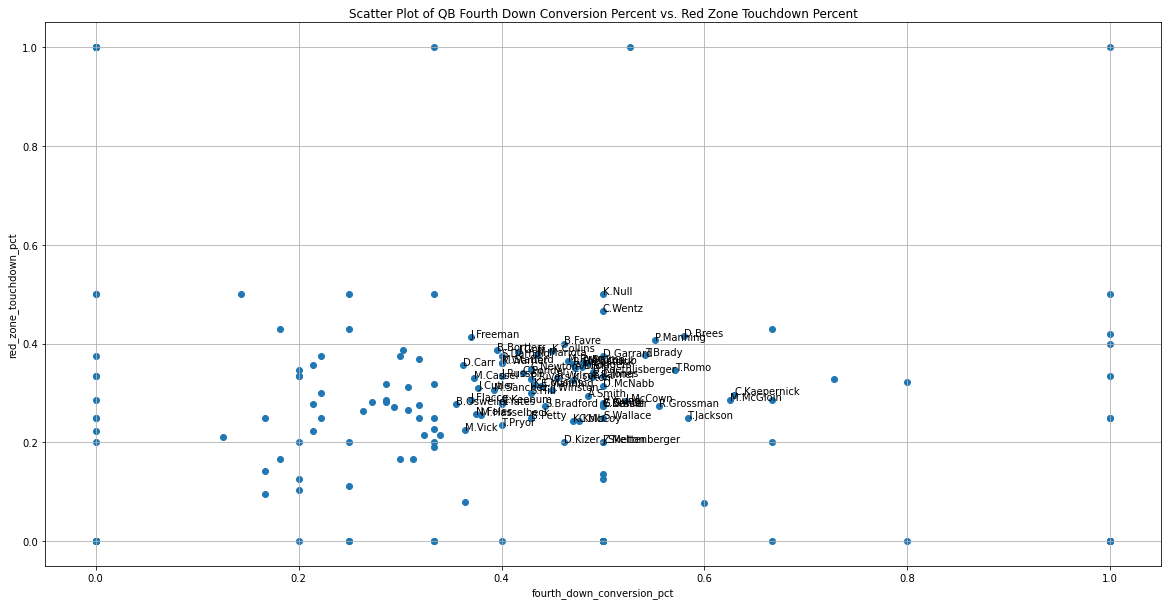

In [426]:
fig, ax = plt.subplots()
ax.scatter(clutchQBFrame['fourth_down_conversion_pct'], clutchQBFrame['red_zone_touchdown_pct'])
fig.set_size_inches(20,10)
ax.set_title('Scatter Plot of QB Fourth Down Conversion Percent vs. Red Zone Touchdown Percent')
ax.set_xlabel('fourth_down_conversion_pct')
ax.set_ylabel('red_zone_touchdown_pct')
for i, txt in enumerate(clutchQBFrame.index.to_list()):
    if (clutchQBFrame.iloc[i][0] > 0.341681 and clutchQBFrame.iloc[i][0] < 0.658219) and (clutchQBFrame.iloc[i][1] > 0.178624 and clutchQBFrame.iloc[i][1] < 0.658219):
    # if (clutchQBFrame.iloc[i] > 0.23):
        ax.annotate(txt, (clutchQBFrame.iloc[i][0], clutchQBFrame.iloc[i][1]))   
ax.grid()
plt.show()

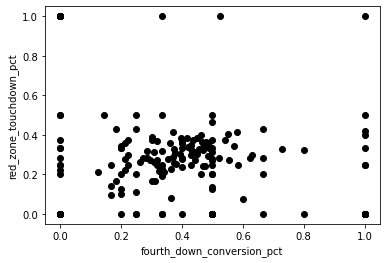

In [406]:
X = clutchQBFrame[['fourth_down_conversion_pct','red_zone_touchdown_pct']]
#Visualise data points
plt.scatter(X['fourth_down_conversion_pct'],X['red_zone_touchdown_pct'],c='black')
plt.xlabel('fourth_down_conversion_pct')
plt.ylabel('red_zone_touchdown_pct')
plt.show()


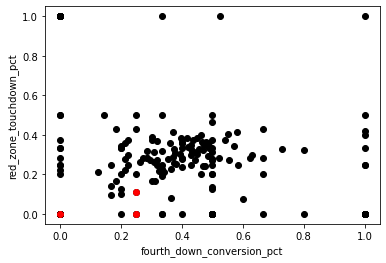

In [407]:
#number of clusters
K=3
X = clutchQBFrame
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['fourth_down_conversion_pct'],X['red_zone_touchdown_pct'],c='black')
plt.scatter(Centroids['fourth_down_conversion_pct'],Centroids['red_zone_touchdown_pct'],c='red')
plt.xlabel('fourth_down_conversion_pct')
plt.ylabel('red_zone_touchdown_pct')
# plt.xscale('log')
# plt.xscale('log')
plt.show()

In [409]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['fourth_down_conversion_pct']-row_d['fourth_down_conversion_pct'])**2
            d2=(row_c['red_zone_touchdown_pct']-row_d['red_zone_touchdown_pct'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[['red_zone_touchdown_pct','fourth_down_conversion_pct']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['red_zone_touchdown_pct'] - Centroids['red_zone_touchdown_pct']).sum() + (Centroids_new['fourth_down_conversion_pct'] - Centroids['fourth_down_conversion_pct']).sum()
    Centroids = X.groupby(["Cluster"]).mean()[['red_zone_touchdown_pct','fourth_down_conversion_pct']]

In [410]:
Centroids

,red_zone_touchdown_pct,fourth_down_conversion_pct
Cluster,,
1,0.411547,0.341681
2,0.074739,0.865051
3,0.015131,0.016347


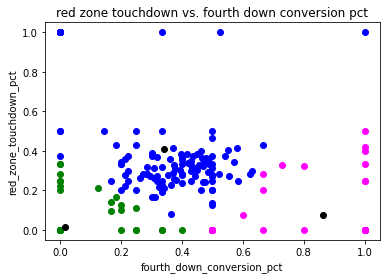

In [416]:
color=['blue','magenta','green']
for k in range(K):
    outlierData=X[X["Cluster"]==k+1]
    plt.scatter(outlierData['fourth_down_conversion_pct'],outlierData['red_zone_touchdown_pct'],c=color[k])
plt.scatter(Centroids['fourth_down_conversion_pct'],Centroids['red_zone_touchdown_pct'],c='black')
plt.xlabel('fourth_down_conversion_pct')
plt.ylabel('red_zone_touchdown_pct')
plt.title('red zone touchdown vs. fourth down conversion pct')
plt.show()